In [1]:
############################# CALCULO DE CVA y DVA #############################

# Se cargan las librerías a emplear en el cálculo del CVA y DBA
# Debido a que la librería de Quantlib no está instalada en Colab, aplicamos el pip
# Si ejecuta esto en un IDE de python, como pycharm, previamente debe tener instalados estas librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install QuantLib
import QuantLib as ql

In [2]:
# Carga desde el dispositivo, el archivo en excel tal cual como me fue enviado por correo "Factores_Prueba_Analista.xlsx" al google colaboratory
from google.colab import files 
uploaded = files.upload()

Saving Factores_Prueba_Analista.xlsx to Factores_Prueba_Analista (7).xlsx


In [3]:
#Creamos un dataframe para cada hoja del excel
#Dataframe de la hoja 0
import io                
df0 = pd.read_excel(io.BytesIO(uploaded['Factores_Prueba_Analista.xlsx']),sheet_name=0)                        
print(df0)

          Fecha      TRM
0    2012-12-19  1790.46
1    2012-12-20  1788.87
2    2012-12-21  1779.79
3    2012-12-24  1773.44
4    2012-12-25  1773.44
...         ...      ...
2041 2020-10-15  3854.47
2042 2020-10-16  3846.48
2043 2020-10-19  3842.76
2044 2020-10-20  3830.79
2045 2020-10-21  3784.51

[2046 rows x 2 columns]


In [4]:
#Dataframe de la hoja 1
import io                
df1 = pd.read_excel(io.BytesIO(uploaded['Factores_Prueba_Analista.xlsx']),sheet_name=1)                        
print(df1)

     Fecha\Nodos        1        30  ...      5400      7200      9000
0     2016-06-30  0.07134  0.071668  ...  0.136527  0.181485  0.229771
1     2016-07-01  0.07129  0.071664  ...  0.136645  0.181623  0.230016
2     2016-07-04  0.07129  0.071664  ...  0.136645  0.181623  0.230016
3     2016-07-05  0.07125  0.071889  ...  0.131146  0.173814  0.219429
4     2016-07-06  0.07128  0.071889  ...  0.131042  0.173688  0.219255
...          ...      ...       ...  ...       ...       ...       ...
1120  2020-10-15  0.01710  0.017369  ...  0.079027  0.102223  0.118545
1121  2020-10-16  0.01711  0.017237  ...  0.079048  0.102254  0.118563
1122  2020-10-19  0.01711  0.017102  ...  0.078965  0.102148  0.118474
1123  2020-10-20  0.01712  0.017103  ...  0.078700  0.101774  0.118002
1124  2020-10-21  0.01712  0.017309  ...  0.078218  0.101092  0.117123

[1125 rows x 21 columns]


In [5]:
#Dataframe de la hoja 2
import io                
df2 = pd.read_excel(io.BytesIO(uploaded['Factores_Prueba_Analista.xlsx']),sheet_name=2)                        
print(df2)

     Fechas/Nodos         1         7  ...      5400      7200      9000
0      2016-06-30 -0.001424 -0.001718  ...  0.022220  0.025318  0.027891
1      2016-07-01 -0.001590 -0.001175  ...  0.021822  0.024864  0.027306
2      2016-07-04 -0.001590 -0.001175  ...  0.021822  0.024864  0.027306
3      2016-07-05 -0.000341 -0.000570  ...  0.020690  0.023608  0.025872
4      2016-07-06  0.000555  0.001182  ...  0.021169  0.024116  0.026482
...           ...       ...       ...  ...       ...       ...       ...
1120   2020-10-15  0.003090 -0.000198  ...  0.004195  0.005536  0.006189
1121   2020-10-16  0.001199 -0.000516  ...  0.004374  0.005835  0.006428
1122   2020-10-19 -0.000690 -0.001627  ...  0.004656  0.006010  0.006635
1123   2020-10-20  0.002084 -0.001141  ...  0.004981  0.006393  0.007065
1124   2020-10-21  0.004754  0.000169  ...  0.004676  0.006084  0.006755

[1125 rows x 24 columns]


In [6]:
# De la hoja TRM, Calculo la variación día a día 
# Para no afectar el dataframe u hoja del excel, decido crear una copia, donde vamos a agregar esta variación
trm_var = df0
# Corroborar que se haya asignado la hoja TRM  a ese nuevo dataframe
trm_var.head()

,Fecha,TRM
0,2012-12-19,1790.46
1,2012-12-20,1788.87
2,2012-12-21,1779.79
3,2012-12-24,1773.44
4,2012-12-25,1773.44


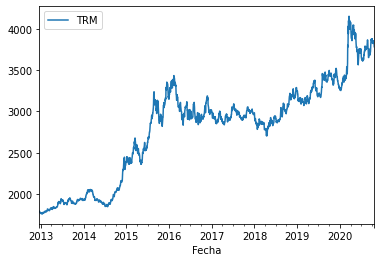

In [7]:
# Graficamos el comportamiento de la TRM en el tiempo
trm_var.plot('Fecha','TRM')

In [8]:
# Tipo de dato en cada columna del df
trm_var.dtypes

Fecha    datetime64[ns]
TRM             float64
dtype: object

In [9]:
# Realizamos el cálculo de la variación en el tiempo
trm_var['Variación'] = (trm_var['TRM'].pct_change())
trm_var['Variación']

0            NaN
1      -0.000888
2      -0.005076
3      -0.003568
4       0.000000
          ...   
2041    0.002831
2042   -0.002073
2043   -0.000967
2044   -0.003115
2045   -0.012081
Name: Variación, Length: 2046, dtype: float64

In [10]:
# Comprobamos la creación de la nueva columna en el df, con la variación día a día
trm_var.head()

,Fecha,TRM,Variación
0,2012-12-19,1790.46,NaN
1,2012-12-20,1788.87,-0.000888
2,2012-12-21,1779.79,-0.005076
3,2012-12-24,1773.44,-0.003568
4,2012-12-25,1773.44,0.000000


In [11]:
# Determinamos dos medidas que vamos a usar más adelante, media y desvStd de la variación asumiendo año con 365 días 
# (Por eso en la ecuación se realizó la conversión para que quede ambos valores a anual
trm_mean_dia = trm_var['Variación'].mean()
trm_DevStd_dia = trm_var['Variación'].std()

# Se realiza la conversión de estos dos resultado, a anual:
trm_mean_año = trm_mean_dia*365*100
trm_DevStd_año = trm_DevStd_dia*(np.sqrt(365))*100
print(f"El promedio de la variación de tasas TRM (diarias) anual es: {trm_mean_año} %")
print(f"La desviación estandar de la variación de tasas TRM (diarias) anual es: {trm_DevStd_año}%")

El promedio de la variación de tasas TRM (diarias) anual es: 14.38175815886498 %
La desviación estandar de la variación de tasas TRM (diarias) anual es: 14.308090435238125%


In [12]:
# Calculamos la devaluación entre las dos curvas IBR y USDIBR, teniendo en cuenta que ambas tienen nodos diferentes
# Así como en el caso de la hoja TRM, para no afectar el dataframe, creamos dos nuevos dataframe
ibr = df1
usdibr = df2
# Se realiza la devaluación al periodo de un año, es decir, al nodo 360. Para ello colocamos el nombre de la columna (360) para ambas IBR.
devaluacion = (((1+ibr[360])/(1+usdibr[360]))-1)*100
devaluacion
# 2. mirar en dataframes como llamar las columnas 360 si es con '360' o con 0:,1:5 o algo así

0       6.962092
1       6.999462
2       6.999462
3       6.978914
4       6.900203
          ...   
1120    2.157997
1121    2.162164
1122    2.157390
1123    2.148386
1124    2.133397
Name: 360, Length: 1125, dtype: float64

In [13]:
# Calculamos la moda y la desviación estandar para esta devaluación (Nodo = 1 año o 360 días)
deval_mean = devaluacion.mean()
deval_DevStd = devaluacion.std()
print(f"El promedio de la devaluación anual (nodo = 360 días) es: {deval_mean} %")
print(f"La desviación estandar de la devaluación anual (nodo = 360 días) es: {deval_DevStd}%")

El promedio de la devaluación anual (nodo = 360 días) es: 3.089171866780428 %
La desviación estandar de la devaluación anual (nodo = 360 días) es: 1.4485816608907904%


# Modelo CVA - DVA empleando factor de riesgo: IBR - USDIBR

In [14]:
# Con base a la literatura sugerida, y con las formulas encontradas para hallar EE, DF, desarrollamos una tabla
# con proyección de 1 a 365 días (Pudo haber sido, solo hasta 60 que es el horizonte de 2 meses planteado en el ejercicio)

CVA_IBR = pd.DataFrame(index=np.arange(1,366),columns='Días Años'.split())
CVA_IBR['Días'] = np.arange(1,366)
CVA_IBR

,Días,Años
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
...,...,...
361,361,NaN
362,362,NaN
363,363,NaN
364,364,NaN


In [15]:
# Se calcula el equivalente en años, de cada día, para la columna Años

CVA_IBR['Años'] = CVA_IBR['Días']/365
CVA_IBR

,Días,Años
1,1,0.002740
2,2,0.005479
3,3,0.008219
4,4,0.010959
5,5,0.013699
...,...,...
361,361,0.989041
362,362,0.991781
363,363,0.994521
364,364,0.997260


In [16]:
# Con esta tabla, se calcula el valor de Mean y Dev Std para cada día, según ecuaciones encontradas en bibliografía y
# hojas de cálculo, teniendo en cuenta que:
# Mu: Media de la devaluación
# Sigma: Dev Std de la devaluación

CVA_IBR['Mean'] = ((deval_mean)*CVA_IBR['Años']) 
CVA_IBR['Dev Std'] = (((deval_DevStd)*(np.sqrt(CVA_IBR['Años']))))
CVA_IBR

,Días,Años,Mean,Dev Std
1,1,0.002740,0.008463,0.075822
2,2,0.005479,0.016927,0.107229
3,3,0.008219,0.025390,0.131328
4,4,0.010959,0.033854,0.151644
5,5,0.013699,0.042317,0.169544
...,...,...,...,...
361,361,0.989041,3.055318,1.440622
362,362,0.991781,3.063781,1.442616
363,363,0.994521,3.072245,1.444607
364,364,0.997260,3.080708,1.446596


In [17]:
# Una vez hallados para cada día equivalente en año su Mean y DevStd, calculo la 
# exposición esperada o EE, mediante la ecuación encontrada en la bibliografía, es decir
# el método Semi-Analítico
from scipy.stats import norm
CVA_IBR['EE'] = ((CVA_IBR['Mean']*norm.cdf(CVA_IBR['Mean']/CVA_IBR['Dev Std']))+
             (CVA_IBR['Dev Std']*norm.pdf(CVA_IBR['Mean']/CVA_IBR['Dev Std'])))

# También calculé el PFE o Posible exposición futura, también dada a la ecuación planteada allí:
# Se asume como alpha = 90%
alpha = 0.9
CVA_IBR['PFE'] = CVA_IBR['Mean'] + (norm.ppf(alpha) * CVA_IBR['Dev Std'])

CVA_IBR

,Días,Años,Mean,Dev Std,EE,PFE
1,1,0.002740,0.008463,0.075822,0.034669,0.105634
2,2,0.005479,0.016927,0.107229,0.051773,0.154346
3,3,0.008219,0.025390,0.131328,0.066064,0.193694
4,4,0.010959,0.033854,0.151644,0.078926,0.228194
5,5,0.013699,0.042317,0.169544,0.090893,0.259596
...,...,...,...,...,...,...
361,361,0.989041,3.055318,1.440622,3.064114,4.901550
362,362,0.991781,3.063781,1.442616,3.072518,4.912569
363,363,0.994521,3.072245,1.444607,3.080922,4.923584
364,364,0.997260,3.080708,1.446596,3.089327,4.934596


In [18]:
# Una vez calculado Exposición Esperada o EE, se calcula los "Descount Factors" o DF
# Esto, mediante formulación planteada para resolver el ejemplo de la hoja de calculo 7.1 de la bibliografía
# Se utiliza la tasa de interés de hoy (Asumiendo que hoy es: '2020-10-20'), con lo cual se ubica dicha tasa de interés dentro de la BD
tasa_interes = ibr.iloc[1123,6]
tasa_interes

#Se procede con el cálculo del DF:
CVA_IBR['DF'] = np.exp(-tasa_interes*CVA_IBR['Años'])
CVA_IBR

,Días,Años,Mean,Dev Std,EE,PFE,DF
1,1,0.002740,0.008463,0.075822,0.034669,0.105634,0.999951
2,2,0.005479,0.016927,0.107229,0.051773,0.154346,0.999902
3,3,0.008219,0.025390,0.131328,0.066064,0.193694,0.999854
4,4,0.010959,0.033854,0.151644,0.078926,0.228194,0.999805
5,5,0.013699,0.042317,0.169544,0.090893,0.259596,0.999756
...,...,...,...,...,...,...,...
361,361,0.989041,3.055318,1.440622,3.064114,4.901550,0.982551
362,362,0.991781,3.063781,1.442616,3.072518,4.912569,0.982503
363,363,0.994521,3.072245,1.444607,3.080922,4.923584,0.982455
364,364,0.997260,3.080708,1.446596,3.089327,4.934596,0.982407


In [19]:
# Una vez ya calculados el EE y el DF, se empleará la ecuación práctica para calcular el CVA y DVA
# Esta ecuación tiene un componente llamado Pérdida por incumplimiento (Loss given default), que es el
# resultado de la resta de (1 - delta), siendo delta, la tasa de recuperación de ambas partes.
# Por lo anterior, y según el planteamiento del ejercicio, la tasa de recuperación dee ambas partes es = 40%
tr = 0.4

# Otro factor, es la probabilidad de incumplimiento (Default Probability), siendo:
# Para calcular DVA, probabilidad incumplimiento de Don José  = 2%
# Para calcular CVA, probabilidad incumplimiento del banco = 0.5%
DP_Banco = 0.02
DP_Cliente = 0.005

# Con lo anterior, procedemos con los respectivos cálculos:
CVA_IBR['CVA'] = (1-tr)*(CVA_IBR['EE'])*(CVA_IBR['DF'])*(DP_Banco)
CVA_IBR['DVA'] = (1-tr)*(CVA_IBR['EE'])*(CVA_IBR['DF'])*(DP_Cliente)
CVA_IBR

,Días,Años,Mean,Dev Std,EE,PFE,DF,CVA,DVA
1,1,0.002740,0.008463,0.075822,0.034669,0.105634,0.999951,0.000416,0.000104
2,2,0.005479,0.016927,0.107229,0.051773,0.154346,0.999902,0.000621,0.000155
3,3,0.008219,0.025390,0.131328,0.066064,0.193694,0.999854,0.000793,0.000198
4,4,0.010959,0.033854,0.151644,0.078926,0.228194,0.999805,0.000947,0.000237
5,5,0.013699,0.042317,0.169544,0.090893,0.259596,0.999756,0.001090,0.000273
...,...,...,...,...,...,...,...,...,...
361,361,0.989041,3.055318,1.440622,3.064114,4.901550,0.982551,0.036128,0.009032
362,362,0.991781,3.063781,1.442616,3.072518,4.912569,0.982503,0.036225,0.009056
363,363,0.994521,3.072245,1.444607,3.080922,4.923584,0.982455,0.036322,0.009081
364,364,0.997260,3.080708,1.446596,3.089327,4.934596,0.982407,0.036420,0.009105


In [20]:
# Dado el ejercicio, que establece un horizonte de 1 mes y 2 meses, obtenienen los siguientes resultados:
tabla = pd.DataFrame({'30 dias': [round(sum(CVA_IBR.loc[:30,'CVA']),6),round(sum(CVA_IBR.loc[:30,'DVA']),6)], 
                      '60 dias': [round(sum(CVA_IBR.loc[:60,'CVA']),6),round(sum(CVA_IBR.loc[:60,'DVA']),6)]},
                      index=['Exposición Banco','Exposición Cliente'])
tabla

,30 dias,60 dias
Exposición Banco,0.068777,0.230952
Exposición Cliente,0.017194,0.057738


In [21]:
# Esto quiere decir, que si el monto es de $100.000 USD, el CVA y DVA, sería, 
# (Se divide entre 100 dado que no están en formato porcentaje las anteriores cifras), 
# en los dos horizontes, para ambos, el siguiente riesgo:

tabla_USD = (tabla*100000)/100
tabla_USD

,30 dias,60 dias
Exposición Banco,68.777,230.952
Exposición Cliente,17.194,57.738


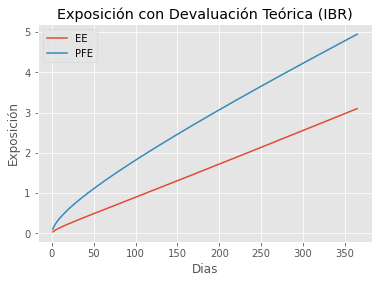

In [22]:
# Así, como en el libro referencia, mostramos, la gráfica empleando EE y lo que implicaría
# reemplazar en la ecuación, el EE, por el PFE:

plt.style.use('ggplot')
plt.plot(CVA_IBR['Días'], CVA_IBR['EE'], label = 'EE') 
plt.plot(CVA_IBR['Días'], CVA_IBR['PFE'], label = 'PFE')
plt.legend()
plt.title('Exposición con Devaluación Teórica (IBR)')
plt.xlabel('Dias')
plt.ylabel('Exposición')
plt.show()

# Modelo CVA - DVA empleando factor de riesgo: TRM

In [23]:
# Se repite de forma similar los pasos realizados para el anterior cálculo del CVA - DVA
# Creamos una tabla con proyección de 1 a 365 días (Pudo haber sido, solo hasta 60 que es el horizonte de 2 meses planteado en el ejercicio)
CVA_TRM = pd.DataFrame(index=np.arange(1,366),columns='Días Años'.split())
CVA_TRM['Días'] = np.arange(1,366)

# Se calcula el equivalente en años, de cada día, para la columna Años
CVA_TRM['Años'] = CVA_TRM['Días']/365

# Calcula el valor de Mean y Dev Std para cada día
CVA_TRM['Mean'] = ((trm_mean_año/100)*CVA_TRM['Años']) 
CVA_TRM['Dev Std'] = (((trm_DevStd_año/100)*(np.sqrt(CVA_TRM['Años']))))

# calculo de la exposición esperada o EE, según método Semi-Analítico
from scipy.stats import norm
CVA_TRM['EE'] = (((CVA_TRM['Mean']*norm.cdf(CVA_TRM['Mean']/CVA_TRM['Dev Std']))+
             (CVA_TRM['Dev Std']*norm.pdf(CVA_TRM['Mean']/CVA_TRM['Dev Std']))))*100

# Calculo del PFE o Posible exposición futura, asumiendo alpha = 90%
alpha = 0.9
CVA_TRM['PFE'] = (CVA_TRM['Mean'] + (norm.ppf(alpha) * CVA_TRM['Dev Std']))*100

# Se utiliza la tasa de interés igual a como se usó en el anterior cálculo del CVA 
# (Asumiendo que hoy es: '2020-10-20'), ubicada dicha tasa de interés dentro de la BD
# Dado que allí está representadas las tasas, para esta fecha proyectada a 360 días, cosa que
# no tiene la tabla de TRM
tasa_interes = ibr.iloc[1123,6]

# Cálculo del DF:
CVA_TRM['DF'] = np.exp(-tasa_interes*CVA_TRM['Años'])

# Siendo Pérdida por incumplimiento (1 - delta), la tasa de recuperación de ambas parte es = 40%
tr = 0.4

# Para calcular DVA, probabilidad incumplimiento de Don José = 2%
# Para calcular CVA, probabilidad incumplimiento del banco = 0.5%
DP_Banco = 0.02
DP_Cliente = 0.005

# Con lo anterior, procedemos con los respectivos cálculos:
CVA_TRM['CVA'] = (1-tr)*(CVA_TRM['EE'])*(CVA_TRM['DF'])*(DP_Banco)
CVA_TRM['DVA'] = (1-tr)*(CVA_TRM['EE'])*(CVA_TRM['DF'])*(DP_Cliente)
CVA_TRM

,Días,Años,Mean,Dev Std,EE,PFE,DF,CVA,DVA
1,1,0.002740,0.000394,0.007489,0.318890,0.999181,0.999951,0.003826,0.000957
2,2,0.005479,0.000788,0.010591,0.463104,1.436137,0.999902,0.005557,0.001389
3,3,0.008219,0.001182,0.012972,0.578745,1.780593,0.999854,0.006944,0.001736
4,4,0.010959,0.001576,0.014978,0.679661,2.077167,0.999805,0.008154,0.002039
5,5,0.013699,0.001970,0.016746,0.771206,2.343142,0.999756,0.009252,0.002313
...,...,...,...,...,...,...,...,...,...
361,361,0.989041,0.142241,0.142295,15.410530,32.459954,0.982551,0.181700,0.045425
362,362,0.991781,0.142636,0.142492,15.448448,32.524596,0.982503,0.182138,0.045534
363,363,0.994521,0.143030,0.142688,15.486366,32.589204,0.982455,0.182576,0.045644
364,364,0.997260,0.143424,0.142885,15.524284,32.653776,0.982407,0.183014,0.045754


In [24]:
# Dado el ejercicio, que establece un horizonte de 1 mes y 2 meses, obtenienen los siguientes resultados:
tabla_TRM = pd.DataFrame({'30 dias': [round(sum(CVA_TRM.loc[:30,'CVA']),6),round(sum(CVA_TRM.loc[:30,'DVA']),6)], 
                      '60 dias': [round(sum(CVA_TRM.loc[:60,'CVA']),6),round(sum(CVA_TRM.loc[:60,'DVA']),6)]},
                      index=['Exposición Banco','Exposición Cliente'])
tabla_TRM

,30 dias,60 dias
Exposición Banco,0.521449,1.609655
Exposición Cliente,0.130362,0.402414


In [25]:
# Esto quiere decir, que si el monto es de $100.000 USD, el CVA y DVA, sería, 
# (Se divide entre 100 dado que no están en formato porcentaje las anteriores cifras), 
# en los dos horizontes, para ambos, el siguiente riesgo:

tabla_TRM_USD = (tabla_TRM*100000)/100
tabla_TRM_USD

,30 dias,60 dias
Exposición Banco,521.449,1609.655
Exposición Cliente,130.362,402.414


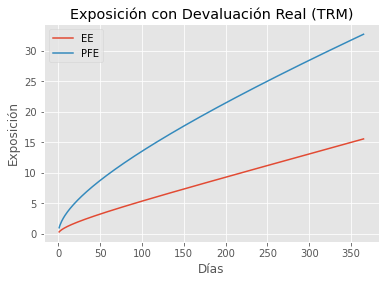

In [26]:
# ráfica empleando EE y lo que implicaría reemplazar en la ecuación, el EE, por el PFE:

plt.plot(CVA_TRM['Días'], CVA_TRM['EE'], label = 'EE') 
plt.plot(CVA_TRM['Días'], CVA_TRM['PFE'], label = 'PFE')
plt.legend()
plt.title('Exposición con Devaluación Real (TRM)')
plt.xlabel('Días')
plt.ylabel('Exposición')
plt.show()